In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib widget

In [2]:
def g(n, m, N_x): 
    '''
    Give vector embedding index for gridpoints
    '''
    return m * N_x + n

def x_diff(Dx, Dy, N, M, left=lambda y : 0, right=lambda y : 0, verbose=False): 
    '''
    D_x matrix operator for Poisson's equation
    '''
    matrix = np.zeros((N * M, N * M))
    bounds_x = np.zeros(N * M)
    
    for m in range(M):
        j = g(0,m,N)
        k = g(1,m,N)
        if verbose:
            print(f'n: {m}, (j,k): {(j,k)}')
        
        matrix[j,j] = -2
        matrix[j,k] = 1
        matrix[k,j] = 1
        #left boundary
        bounds_x[j] = -left(m * Dy) / (Dx ** 2)
        #print(f'j left: {j}')
        
        
        for n in range(1, N-1):
            i = g(n-1,m,N)
            j = g(n,m,N)
            k = g(n+1,m,N)
            if verbose:
                print(f'(n,m) : {(n,m)}, (i,j,k): {(i,j,k)}')
            
            matrix[i,j] = 1
            matrix[j,i] = 1
            matrix[j,j] = -2
            matrix[k,j] = 1 
            matrix[j,k] = 1
            
        
        i = g(N-2, m, N)
        j = g(N-1, m, N)
        #print(f'j right: j:{j}')
        if verbose:
            print(f'n: {m}, (j,k): {(j,k)}')
        
        matrix[j,i] = 1
        matrix[j,j] = -2
        matrix[i,j] = 1
        #right boundary
        bounds_x[j] = -right(m * Dy) / (Dx ** 2)
            
        
    return (bounds_x, 1 / (Dx ** 2) * matrix)

def y_diff(Dx, Dy, N, M, top=lambda x : 0, bottom=lambda x : 0, verbose=False): 
    '''
    D_y matrix operator for Poisson's equation
    '''
    matrix = np.zeros((N * M, N * M))
    bounds_y = np.zeros(N * M)
    
    for n in range(N):
        j = g(n,0,N)
        k = g(n,1,N)
        if verbose:
            print(f'n: {n}, (j,k): {(j,k)}')
        
        matrix[j,j] = -2
        matrix[j,k] = 1
        matrix[k,j] = 1
        #bottom boundary
        if j == N*M - 1:
            pass
        else:
            bounds_y[j] = -bottom(n * Dx) / (Dy ** 2)
       # print(f'j bottom: {j}')
        
        
        for m in range(1, M-1):
            i = g(n,m-1,N)
            j = g(n,m,N)
            k = g(n,m+1,N)
            if verbose:
                print(f'(n,m) : {(n,m)}, (i,j,k): {(i,j,k)}')
            
            matrix[i,j] = 1
            matrix[j,i] = 1
            matrix[j,j] = -2
            matrix[k,j] = 1 
            
        
        i = g(n, M - 2, N)
        j = g(n, M-1, N)
        
        if verbose:
            print(f'n: {n}, (j,k): {(j,k)}')
        
        matrix[j,i] = 1
        matrix[j,j] = -2
        matrix[i,j] = 1
        #top boundary
        if j == N*M - 1:
            pass
        else:
            bounds_y[j] = -top(n * Dx) / (Dy ** 2)
        #print(f'j top: {j}')
            
        
    return (bounds_y, 1 / (Dy ** 2) * matrix)

In [3]:
def normal(y):
    return 1 / (2 * np.pi * 0.2) * np.exp(-0.5 * (y - 0.5) ** 2 / (0.2 ** 2))

N = 49
Dx = 1 / (N + 1)
Dy = 1 / (N + 1)
bounds_x, D_x = x_diff(Dx, Dy, N, N,right=normal,left=lambda y : 0)
bounds_y, D_y = y_diff(Dx, Dy, N, N,top=lambda x : 0, bottom=lambda x : 0)

smb = bounds_x + bounds_y
matrix = D_x + D_y

f = np.dot(np.linalg.inv(matrix), smb)

In [4]:
def bottom(x):
    if x > 0.3 and x < 0.7:
        return 0.5
    else:
        return 0

bounds_y_2, D_y_2 = y_diff(Dx, Dy, N, N,top=lambda x : 0, bottom=bottom)

smb_2 = bounds_x + bounds_y_2
matrix_2 = D_x + D_y_2

f_2 = np.dot(np.linalg.inv(matrix_2), smb_2)

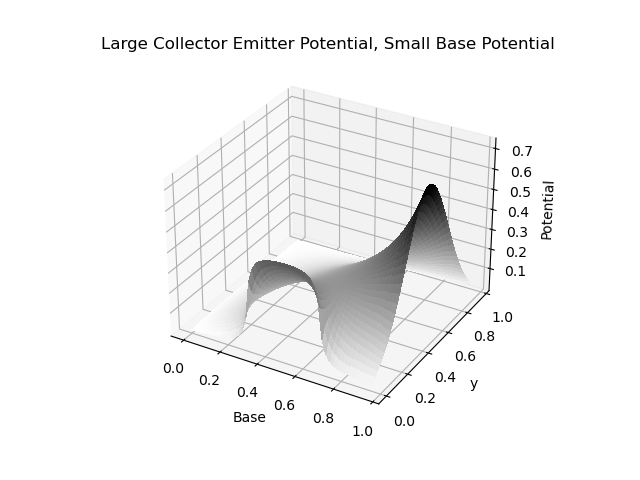

In [5]:
n,m = np.meshgrid(np.arange(N),np.arange(N))
x = n * Dx
y = m * Dy
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
def phi_2(n,m,N):
    return f_2[g(n,m,N)]

def phi(n,m,N):
    return f[g(n,m,N)]

V = phi(n,m,N)
V_2 = phi_2(n,m,N)

ax.plot_surface(x, y, V_2, cmap=cm.binary,
                       linewidth=0, antialiased=False)
ax.set_title('Large Collector Emitter Potential, Small Base Potential')
ax.set_ylabel('y')
ax.set_xlabel('Base')
ax.set_zlabel('Potential')
ax.grid()

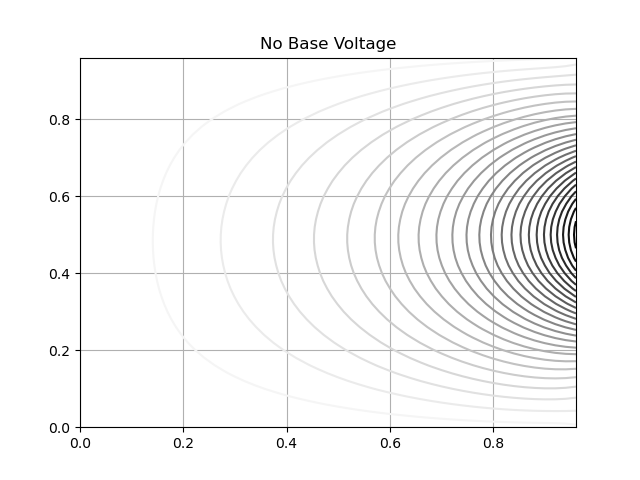

In [6]:
fig, ax = plt.subplots()
ax.contour(x, y, V, cmap=cm.binary,levels=25)
plt.title('No Base Voltage')
ax.grid()

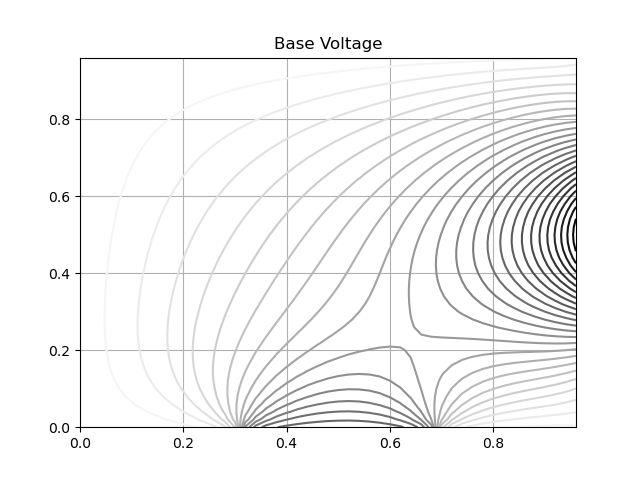

In [7]:
 fig, ax = plt.subplots()

ax.contour(x, y, V_2, cmap=cm.binary,levels=25)
plt.title('Base Voltage')
ax.grid()